# Data Analytics Project (2025)

#### **Name**: Sagar Kumar  
#### **Course**: MDET-102-Data Analytics
#### **Semester**: Summer 2025
#### **Instructor**: Dr. Alexej Schelle

# Index
#### 1. Data Import and Pre-processing
#### 2. Exploratory Data Analysis
#### 3. Correlation Matrix
#### 4. Shannon Entropy
#### 5. Machine Learning Analysis
#### 6. Optimizing Features

## 1. Data Import and Pre-processing


In [161]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [162]:
# preview raw data
df = pd.read_csv("data.csv")
print("Digital Literacy Education Dataset:")
df.head(5)

Digital Literacy Education Dataset:


,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


In [163]:
# find shape of data: 1000 observatoins and 23 features
df.shape

(1000, 23)

In [164]:
# features counts
print("Features Count:")
df.count()

Features Count:


User_ID                                         1000
Age                                             1000
Gender                                          1000
Education_Level                                  788
Employment_Status                               1000
Household_Income                                1000
Location_Type                                   1000
Basic_Computer_Knowledge_Score                  1000
Internet_Usage_Score                            1000
Mobile_Literacy_Score                           1000
Post_Training_Basic_Computer_Knowledge_Score    1000
Post_Training_Internet_Usage_Score              1000
Post_Training_Mobile_Literacy_Score             1000
Modules_Completed                               1000
Average_Time_Per_Module                         1000
Quiz_Performance                                1000
Session_Count                                   1000
Engagement_Level                                1000
Adaptability_Score                            

In [165]:
# replace empty/NAN's with 'Unkonwn'
df['Education_Level'] = df['Education_Level'].fillna('Unknown')
print("Feature count after clean-up: ")
df.count()

Feature count after clean-up: 


User_ID                                         1000
Age                                             1000
Gender                                          1000
Education_Level                                 1000
Employment_Status                               1000
Household_Income                                1000
Location_Type                                   1000
Basic_Computer_Knowledge_Score                  1000
Internet_Usage_Score                            1000
Mobile_Literacy_Score                           1000
Post_Training_Basic_Computer_Knowledge_Score    1000
Post_Training_Internet_Usage_Score              1000
Post_Training_Mobile_Literacy_Score             1000
Modules_Completed                               1000
Average_Time_Per_Module                         1000
Quiz_Performance                                1000
Session_Count                                   1000
Engagement_Level                                1000
Adaptability_Score                            

In [166]:
print('Columns Types: \n')
print(df.dtypes)

Columns Types: 

User_ID                                          object
Age                                               int64
Gender                                           object
Education_Level                                  object
Employment_Status                                object
Household_Income                                 object
Location_Type                                    object
Basic_Computer_Knowledge_Score                    int64
Internet_Usage_Score                              int64
Mobile_Literacy_Score                             int64
Post_Training_Basic_Computer_Knowledge_Score      int64
Post_Training_Internet_Usage_Score                int64
Post_Training_Mobile_Literacy_Score               int64
Modules_Completed                                 int64
Average_Time_Per_Module                         float64
Quiz_Performance                                  int64
Session_Count                                     int64
Engagement_Level               

In [167]:
# data without target variable
X = df.drop(columns=["Overall_Literacy_Score"])

# only target variable
y = df["Overall_Literacy_Score"]

# seperate numeric and non numeric column
numeric_features_with_target_variable = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).copy()
categorical_features = X.select_dtypes(include=["object"]).copy()

## 2. Exploratory Data Analysis
### 2.1 Gender Distribution

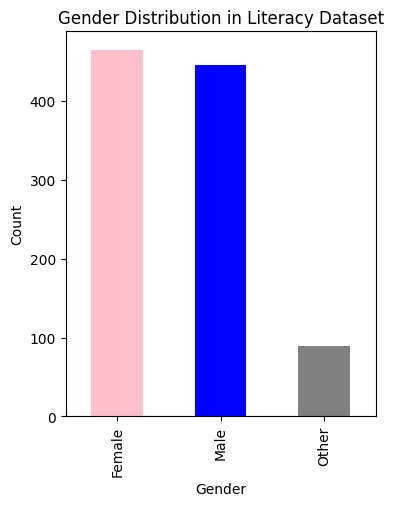

In [168]:
# gender distribution
plt.figure(figsize=(4,5))
df['Gender'].value_counts().plot(kind='bar', color=['pink', 'blue', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Literacy Dataset')
plt.show()

### 2.2 Overall Literacy Score Distribution

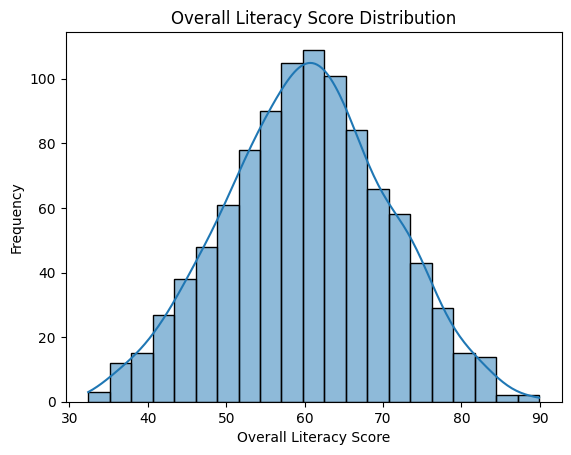

In [169]:
# overall literacy score distribution
sns.histplot(df['Overall_Literacy_Score'], kde=True)
plt.title('Overall Literacy Score Distribution')
plt.xlabel('Overall Literacy Score')
plt.ylabel('Frequency')
plt.show()

### 2.3 Subclass Analysis

In [170]:
# age Group
def age_group(age):
    if age < 30:
        return 'Youth'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

# view average literacy score by age group
print(df.groupby('Age_Group')['Overall_Literacy_Score'].mean())

Age_Group
Adult     60.158612
Senior    60.964968
Youth     59.481716
Name: Overall_Literacy_Score, dtype: float64


In [171]:
# income group
def income_group(income):
    if income == 'Low':
        return 'Lower Class'
    elif income == 'Medium':
        return 'Middle Class'
    else:
        return 'High Class'

df['Income_Group'] = df['Household_Income'].apply(income_group)

# view average literacy score by income group
print(df.groupby('Income_Group')['Overall_Literacy_Score'].mean())

Income_Group
High Class      60.915574
Lower Class     60.128739
Middle Class    60.148763
Name: Overall_Literacy_Score, dtype: float64


In [172]:
# education tier
def education_tier(level):
    if level in ['Primary']:
        return 'Basic'
    elif level in ['Secondary', 'High School']:
        return 'Intermediate'
    else:
        return 'Advanced'

df['Education_Tier'] = df['Education_Level'].apply(education_tier)

# view average literacy score by education tier
print(df.groupby('Education_Tier')['Overall_Literacy_Score'].mean())

Education_Tier
Advanced        59.916509
Basic           60.775912
Intermediate    60.069066
Name: Overall_Literacy_Score, dtype: float64


## 3. Correlation Matrix

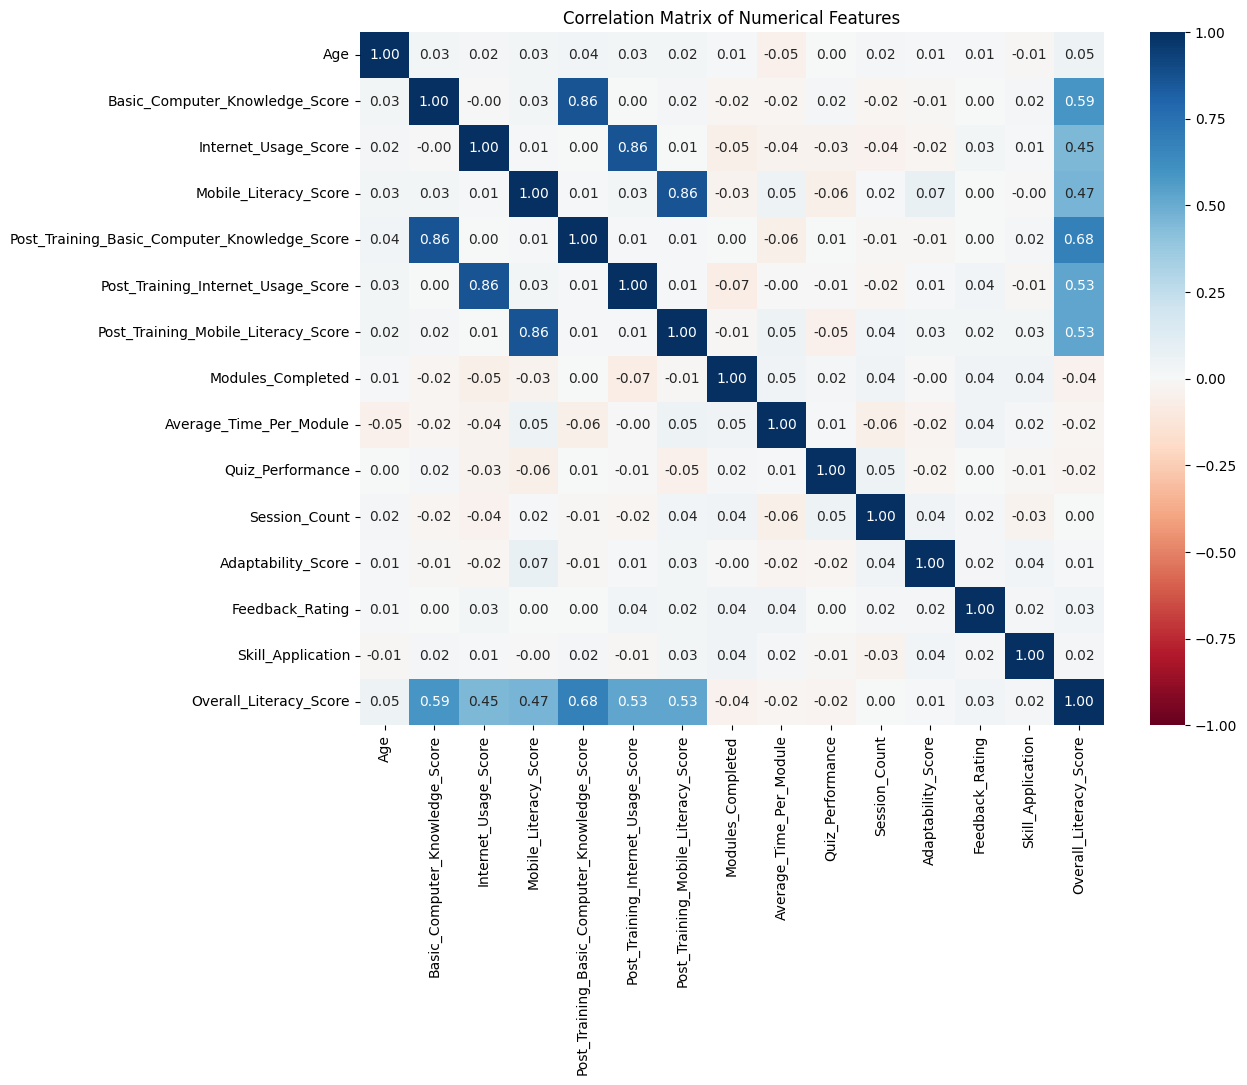

In [173]:
# correlation analysis
plt.figure(figsize=(12, 9))
correlation_matrix = df[numeric_features_with_target_variable].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 4. Shannon Entropy
### 4.1 Shannon Entropy: Original dataset

In [174]:
# get shannon entropy function
def get_shannon_entropy(data):
    _, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -1 * (np.sum(probabilities * np.log2(probabilities)))
    return entropy

# bin the target feature into five discrete and equal intervals
df['Literacy_Bin'] = pd.cut(df['Overall_Literacy_Score'], bins=5, labels=False)

# calculate shannon entropy
original_entropy_value = get_shannon_entropy(df['Literacy_Bin'])
print(f"Original Shannon Entropy of Literacy Bins: {original_entropy_value:.3f}")

Original Shannon Entropy of Literacy Bins: 1.926


### 4.2 Shannon Entropy: Reduction

In [175]:
# create literacy tier using "Overall_Literacy_Score" column
def literacy_tier(literacy_score):
    if literacy_score < 50:
        return 'Low'
    elif 50 <= literacy_score < 70:
        return 'Medium'
    else:
        return 'High'
    
# feature reduction: remove low correlated features
df_reduced = df.drop(columns=['Age', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application'])

# re-bin literacy score
df_reduced['Literacy_Tier'] = df_reduced['Overall_Literacy_Score'].apply(literacy_tier)

# re-calculate entropy
reduced_entropy = get_shannon_entropy(df_reduced['Literacy_Tier'])

# relative change in entropy
relative_change_reduction = (reduced_entropy - original_entropy_value) / original_entropy_value
print(f"Relative entropy change after reduction: {relative_change_reduction:.3f}")

Relative entropy change after reduction: -0.345


### 4.3 Shannon Entropy: Extension

In [176]:
# feature extension
df['high_corr_features'] = (
    df['Basic_Computer_Knowledge_Score'] +
    df['Internet_Usage_Score'] +
    df['Mobile_Literacy_Score'] +
    df['Post_Training_Basic_Computer_Knowledge_Score'] +
    df['Post_Training_Internet_Usage_Score'] +
    df['Post_Training_Mobile_Literacy_Score'] 
)

# re-calculate entropy after extension
df['Extended_Bin'] = pd.cut(df['high_corr_features'], bins=5, labels=False)
extended_entropy = get_shannon_entropy(df['Extended_Bin'])

relative_change_extension = (extended_entropy - original_entropy_value) / original_entropy_value
print(f"Relative entropy change after extension: {relative_change_extension:.3f}")

Relative entropy change after extension: 0.039


## 5. Machine Learning Analysis
### 5.1 ML Analysis: Support Vector Machine

In [177]:
# prepare data-sets for training model
# drop low correlated columns
numeric_features = numeric_features.drop(columns=['Age', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application'])
X_train, X_test, y_train, y_test = train_test_split(numeric_features, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create and train the SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = svm_model.predict(X_test_scaled)

# evaluate model
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

### 5.2 ML Analysis: Random Forest


In [178]:
# random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

### 5.3 ML Analysis: Linear Regression

In [179]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

### 5.4 ML Analysis: Summarized Results

In [180]:
comparison_dataframe = pd.DataFrame({
    'Model': ['SVR', 'Random Forest', 'Linear Regression'],
    'MSE': [svm_mse, rf_mse, lr_mse],
    'R2 Score': [svm_r2, rf_r2, lr_r2]
})

print(comparison_dataframe)

               Model           MSE  R2 Score
0                SVR  2.051635e+00  0.978852
1      Random Forest  3.284678e+00  0.966142
2  Linear Regression  2.365321e-28  1.000000


## 6. Optimizing Features
### 6.1 Deleting Low Correlated Features

In [186]:
# compare true accuracy by deleting low corr feat
low_corr_df = df[['Age', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application', 'Overall_Literacy_Score']]

y = df['Overall_Literacy_Score']

# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(low_corr_df, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = svm_model.predict(X_test_scaled)

# evaluate model performance]
svm_mse_low = mean_squared_error(y_test, y_pred)
svm_r2_low = r2_score(y_test, y_pred)

print(f"SVM Mean Squared Error: {svm_mse_low}")
print(f"SVM R-squared value: {svm_r2_low}")

SVM Mean Squared Error: 6.470945903389367
SVM R-squared value: 0.9332988429147652


### 6.2 Deleting High Correlated Features

In [187]:
# apply same steps as above but remove high correlation features
high_corr_df = df[['Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score', 'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score', 'Overall_Literacy_Score']]

y = df['Overall_Literacy_Score']

X_train, X_test, y_train, y_test = train_test_split(high_corr_df, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

svm_mse_high = mean_squared_error(y_test, y_pred)
svm_r2_high = r2_score(y_test, y_pred)

print(f"SVM Mean Squared Error: {svm_mse_high}")
print(f"SVM R-squared value: {svm_r2_high}")

SVM Mean Squared Error: 1.8248218375180643
SVM R-squared value: 0.9811901181289268


### 6.3 Summarized Results 

In [183]:
# create a DataFrame summarizing the results
results_df = pd.DataFrame({
    'Feature Set': ['Low Correlation Features', 'High Correlation Features'],
    'Mean Squared Error (MSE)': [svm_mse_low, svm_mse_high],
    'R-squared (R²)': [svm_r2_low, svm_r2_high]
})

results_df

,Feature Set,Mean Squared Error (MSE),R-squared (R²)
0,Low Correlation Features,6.470946,0.933299
1,High Correlation Features,1.824822,0.981190
